<a href="https://colab.research.google.com/github/thmainagig/AssemblyScriptContract/blob/main/trendsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

#Data Sources:


*   [Unemployment Rate from FRED](https://fred.stlouisfed.org/series/UNRATE/)
*  [Google Trends](https://trends.google.com/trends/explore)


*   [Yahoo Finance for Stock price](https://finance.yahoo.com/quote/TSLA/history?p=TSLA)
*   [yahoo Finance for Bitcoin Stock Price](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD)







In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_tesla = pd.read_csv('/content/Google Trends Data/TESLA Search Trend vs Price.csv')
df_tesla.shape

(124, 3)

In [4]:
df_unemployment = pd.read_csv('/content/Google Trends Data/UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment.shape

(200, 3)

In [7]:
df_bitdaily = pd.read_csv('/content/Google Trends Data/Daily Bitcoin Price.csv')
df_bitdaily.shape

(2204, 3)

In [9]:
df_bitcoin = pd.read_csv('/content/Google Trends Data/Bitcoin Search Trend.csv')
df_bitcoin.shape

(73, 2)

In [10]:
df_bitcoin.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [11]:
df_bitdaily.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [12]:
df_tesla.TSLA_WEB_SEARCH.min()

2

In [13]:
df_unemployment.UE_BENEFITS_WEB_SEARCH.max()
df_unemployment.isna().values.any()
df_bitdaily.isna().values.any().sum()
df_bitdaily.dropna(inplace=True)
df_bitdaily.isna().values.any()

False

In [14]:
pd.to_datetime(df_bitdaily['DATE'])
df_bitdaily
df_tesla.MONTH = pd.to_datetime(df_tesla['MONTH'])
type(df_tesla['MONTH'][0])
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_bitdaily.DATE = pd.to_datetime(df_bitdaily['DATE'])
df_btc_monthly = df_bitdaily.resample('M', on='DATE').last()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


Text(0.5, 1.0, 'Bitcoin News Search vs Resampled Price')

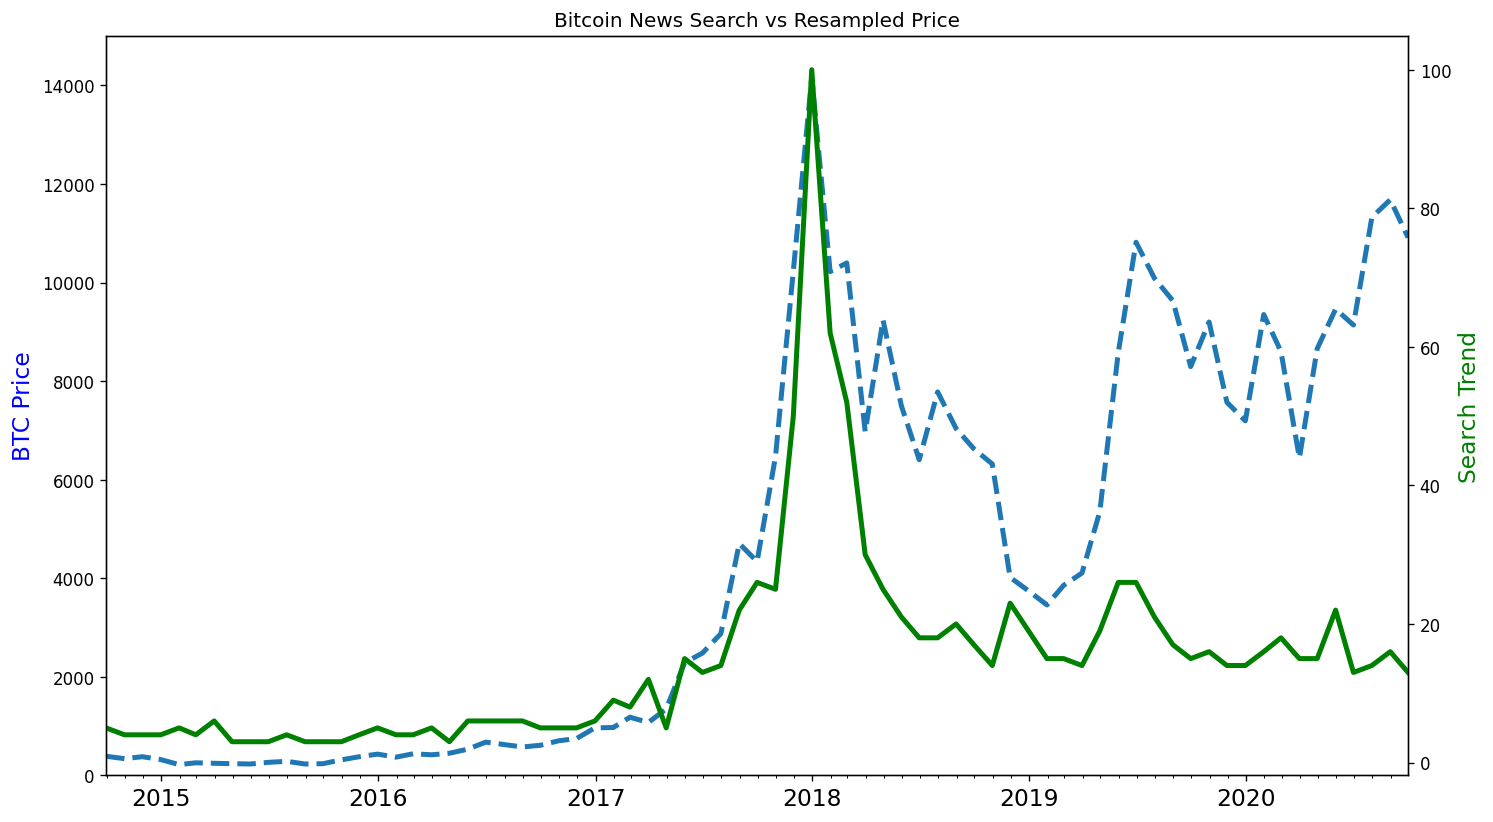

In [44]:
import matplotlib.dates as mdates
year = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('BTC Price', color='b', fontsize=14)
ax2.set_ylabel('Search Trend', color='g', fontsize=14)
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.set_ylim([0,15000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_bitcoin.BTC_NEWS_SEARCH, color='green', linewidth=3)
plt.title('Bitcoin News Search vs Resampled Price')

(12418.0, 18475.0)

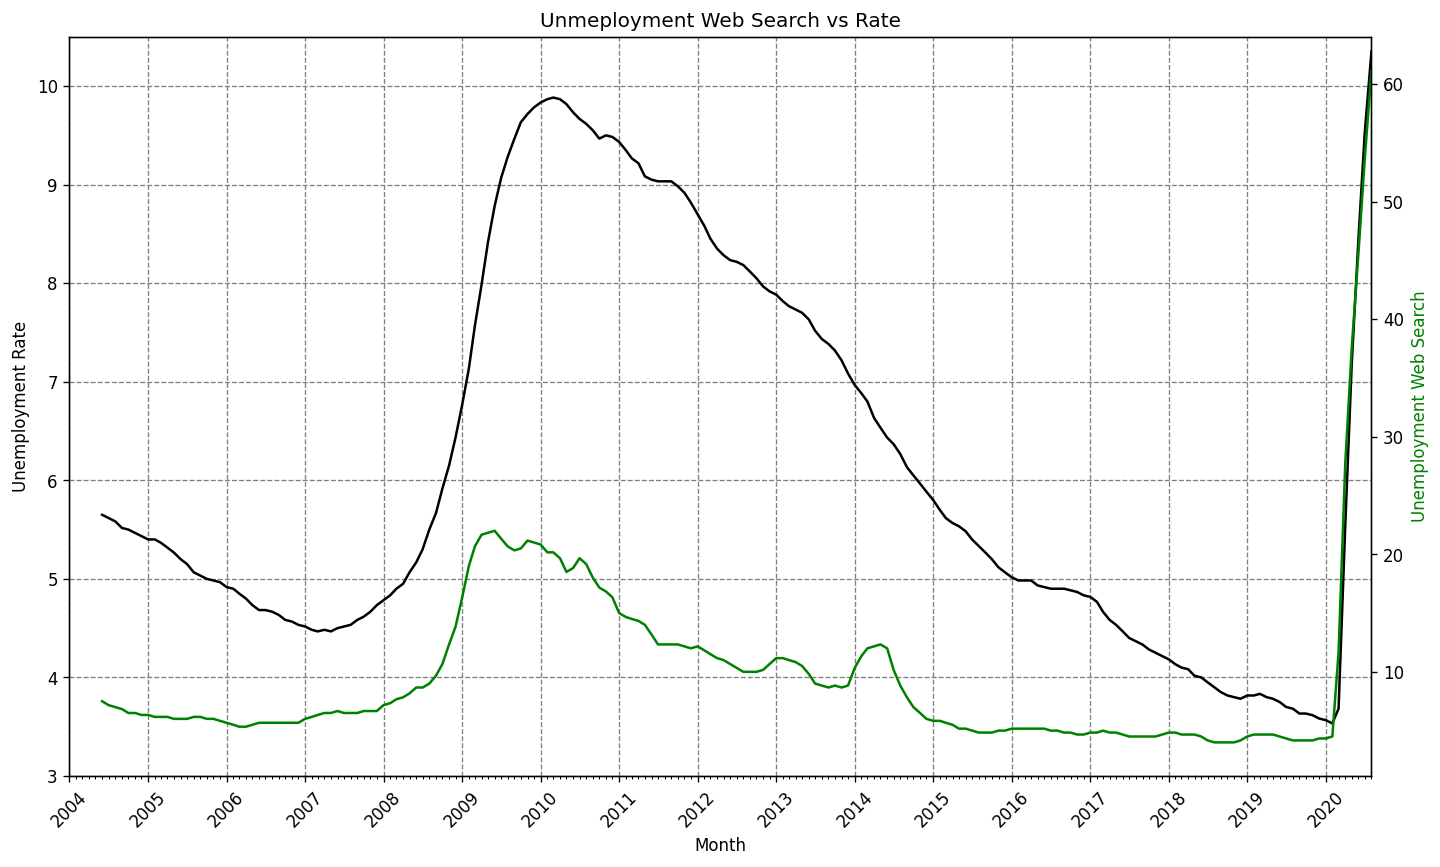

In [55]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
plt.figure(figsize=(14,8), dpi=120)
plt.title('Unmeployment Web Search vs Rate')
plt.xticks(rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.set_ylabel('Unemployment Web Search', color='g')
ax1.set_ylabel('Unemployment Rate')
ax1.set_xlabel('Month')
ax1.grid(color='grey', linestyle='--')

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='black')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='g')

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])